In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [2]:
x = np.array([[-1, -1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
y = np.array([1,1,1,2,2,2])

In [4]:
gaussianNB = GaussianNB()
gaussianNB.fit(x,y)
gaussianNB

GaussianNB()

In [5]:
gaussianNB.predict([[-0.8, -1]])

array([1])

In [6]:
gaussianNB.score(x,y)

1.0

In [7]:
## partial fit lets you use less data to be less computationally expensive

clf_pf = GaussianNB()
clf_pf.partial_fit(x,y, np.unique(y))
GaussianNB()
print(clf_pf.predict([[-0.8,-1]]))

[1]


In [8]:
np.unique(y)

array([1, 2])

In [32]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', names = column_names)

In [50]:
data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [34]:
data.columns

Index([u'col_0', u'col_1', u'col_2', u'col_3', u'col_4', u'col_5', u'col_6',
       u'col_7', u'col_8', u'col_9', u'col_10', u'col_11', u'col_12',
       u'col_13', u'col_14', u'col_15', u'col_16', u'col_17', u'col_18',
       u'col_19', u'col_20', u'col_21', u'col_22', u'col_23', u'col_24',
       u'col_25', u'col_26', u'col_27', u'col_28', u'col_29', u'col_30',
       u'col_31', u'col_32', u'col_33', u'col_34', u'col_35', u'col_36',
       u'col_37', u'col_38', u'col_39', u'col_40', u'col_41', u'col_42',
       u'col_43', u'col_44', u'col_45', u'col_46', u'col_47', u'col_48',
       u'col_49', u'col_50', u'col_51', u'col_52', u'col_53', u'col_54',
       u'col_55', u'col_56', u'col_57'],
      dtype='object')

In [15]:
column_names = ['col_' + str(x) for x in range(0, len(data.columns))]

In [35]:
y = data['col_57']
x = data.drop(['col_54', 'col_55', 'col_56', 'col_57'], axis=1)

In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: col_57, dtype: int64

In [38]:
x.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000


In [42]:
y.isnull().any()

False

In [40]:
x.isnull().any()

col_0     False
col_1     False
col_2     False
col_3     False
col_4     False
col_5     False
col_6     False
col_7     False
col_8     False
col_9     False
col_10    False
col_11    False
col_12    False
col_13    False
col_14    False
col_15    False
col_16    False
col_17    False
col_18    False
col_19    False
col_20    False
col_21    False
col_22    False
col_23    False
col_24    False
col_25    False
col_26    False
col_27    False
col_28    False
col_29    False
col_30    False
col_31    False
col_32    False
col_33    False
col_34    False
col_35    False
col_36    False
col_37    False
col_38    False
col_39    False
col_40    False
col_41    False
col_42    False
col_43    False
col_44    False
col_45    False
col_46    False
col_47    False
col_48    False
col_49    False
col_50    False
col_51    False
col_52    False
col_53    False
dtype: bool

In [46]:
for column in x.columns:
    if x[column].max() > 100.0:
        print x[column].max()

In [47]:
for column in x.columns:
    x[column] = x[column] *0.01

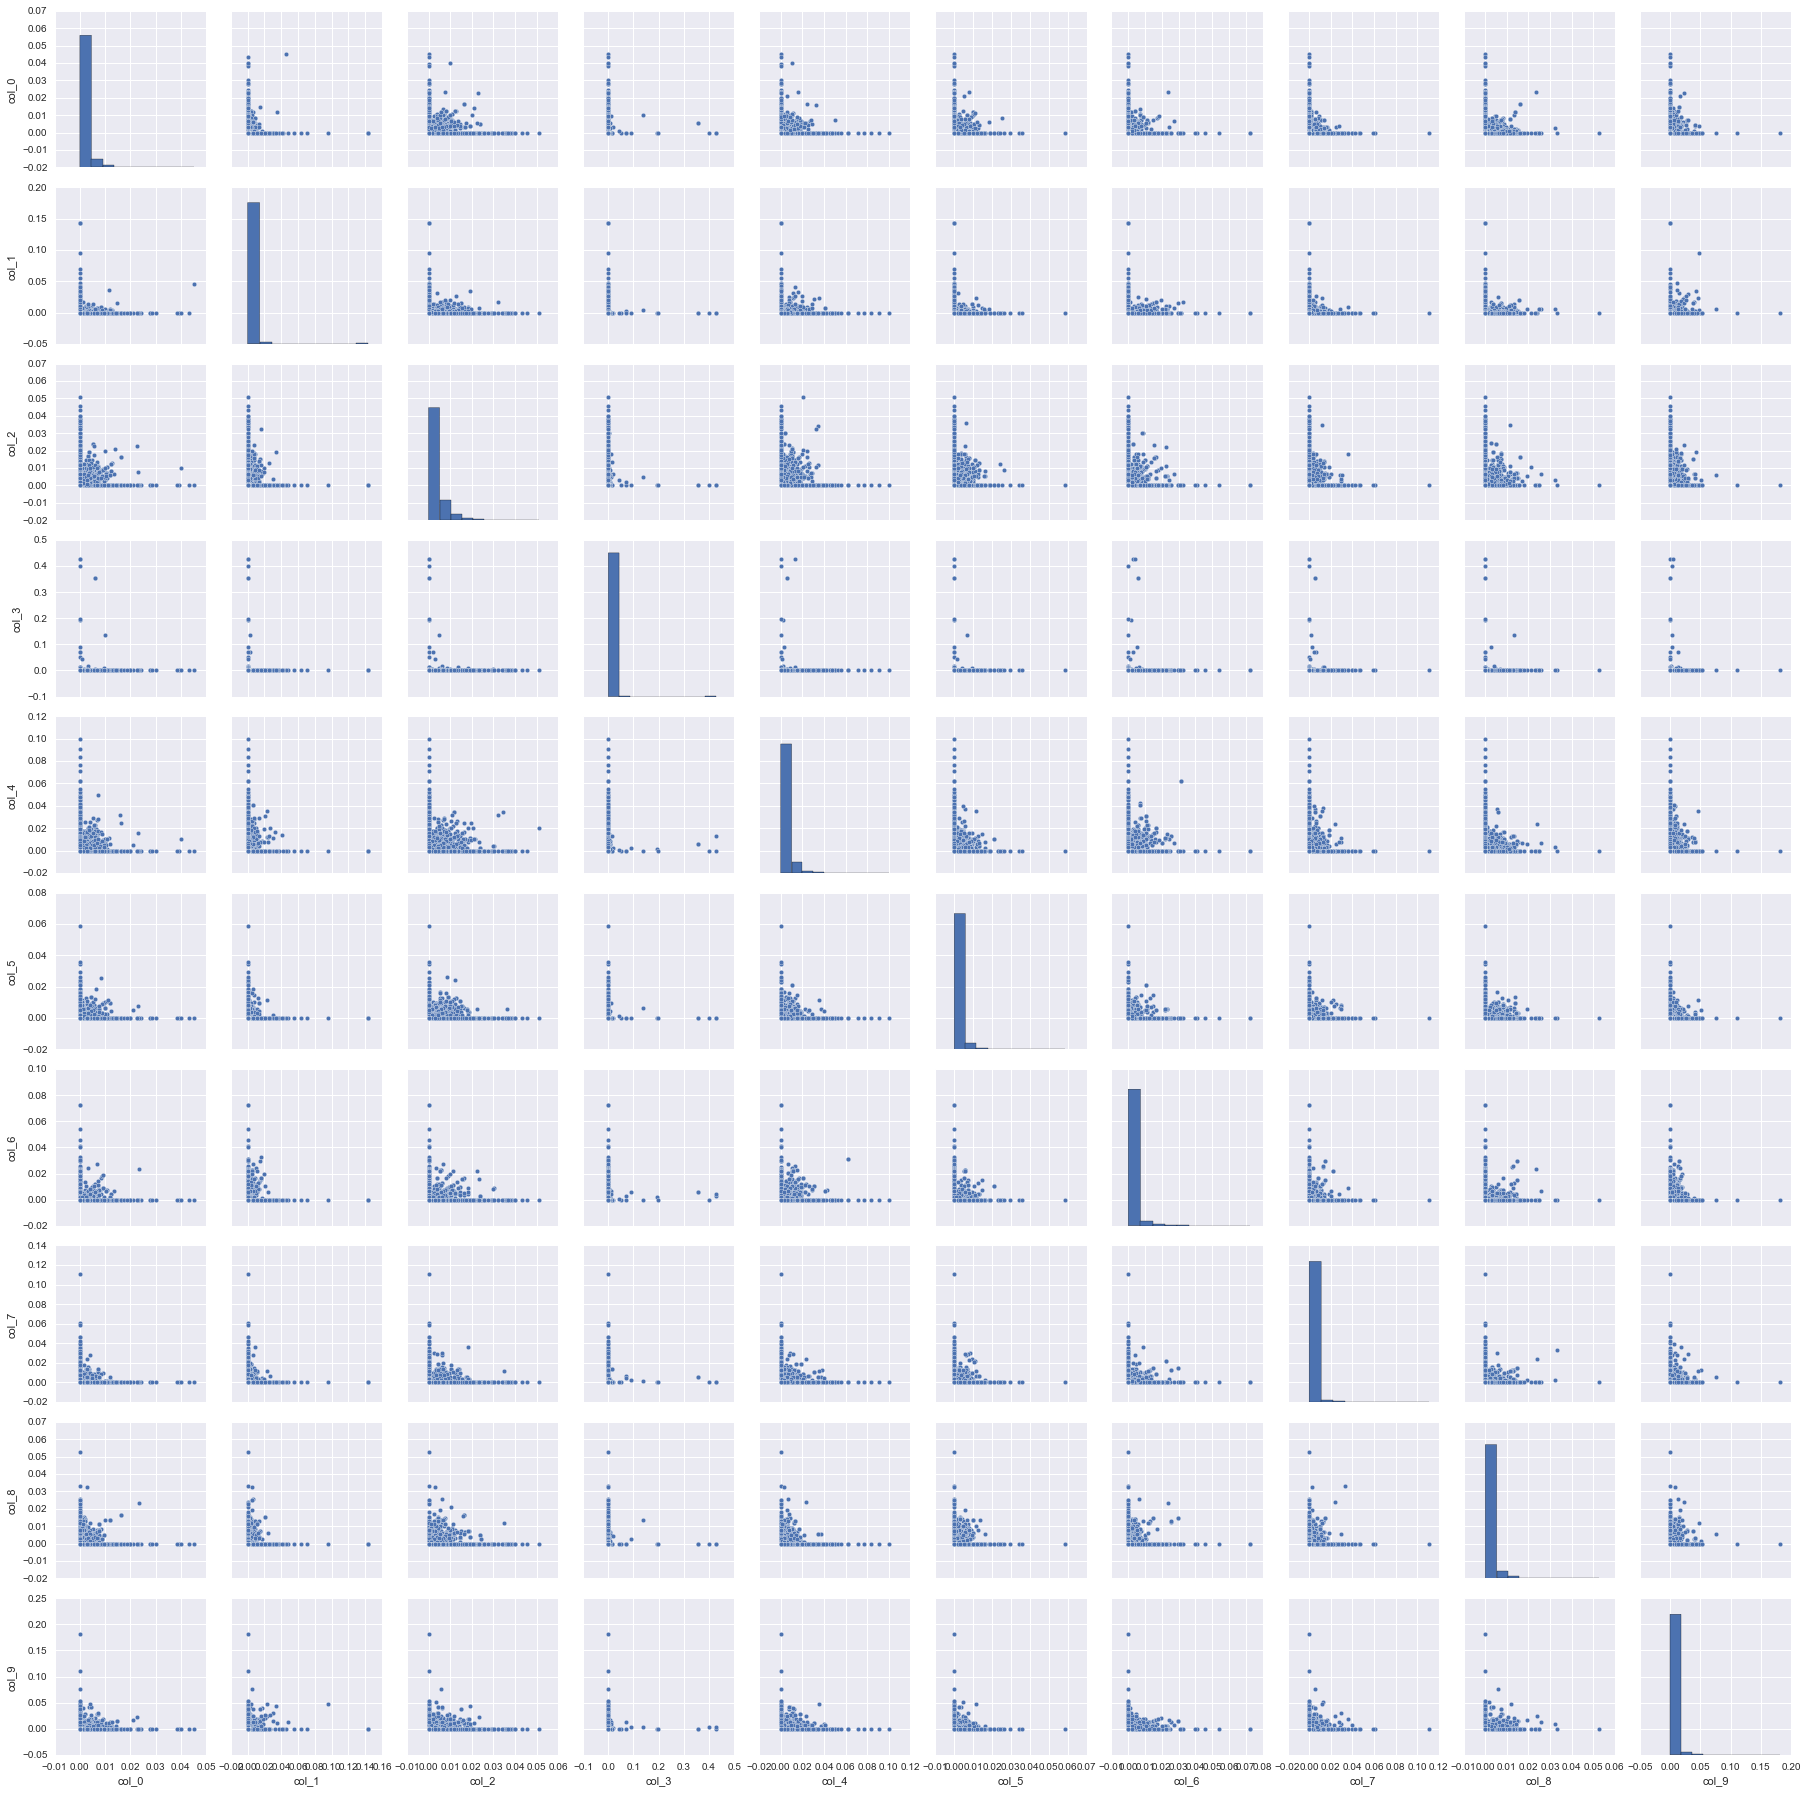

In [49]:
sns.pairplot(x.iloc[:,0:10])

In [51]:
y.value_counts()

0    2788
1    1813
Name: col_57, dtype: int64

In [95]:
1813/(1813+2788.0)

0.39404477287546186

In [52]:
mnb = MultinomialNB()

In [53]:
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
mnb.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
mnb.score(x,y)

0.60725929145837865

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
y_hat = mnb.predict(x)

In [59]:
print classification_report(y, y_hat)

             precision    recall  f1-score   support

          0       0.61      1.00      0.76      2788
          1       1.00      0.00      0.01      1813

avg / total       0.76      0.61      0.46      4601



In [60]:
confusion_matrix(y, y_hat)

array([[2788,    0],
       [1807,    6]])

In [77]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [85]:
x_train.shape

(3450, 54)

In [86]:
y_train.shape

(3450,)

In [87]:
x_test.shape

(1151, 54)

In [78]:
rfc.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
rfc.score(x,y)

0.99239295805259731

In [80]:
rfcpredict = rfc.predict(x)

In [81]:
print classification_report(y, rfcpredict)

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2788
          1       1.00      0.99      0.99      1813

avg / total       0.99      0.99      0.99      4601



In [82]:
confusion_matrix(y, rfcpredict)

array([[2780,    8],
       [  27, 1786]])

In [73]:
predicted_probabilities = mnb.predict_proba(x)
predicted_probabilities[0:5]

array([[ 0.59517944,  0.40482056],
       [ 0.58725293,  0.41274707],
       [ 0.5812276 ,  0.4187724 ],
       [ 0.59391899,  0.40608101],
       [ 0.59392318,  0.40607682]])

In [74]:
predicted_probabilities[:, 0].mean()

0.61086493134752284

In [75]:
predicted_probabilities[:,0].min()

0.41424298537540388

In [76]:
predicted_probabilities[:,0].max()

0.82177841130903106

In [88]:
mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [89]:
mnb.score(x_train, y_train)

0.611304347826087

In [96]:
## mnb is pretty mediocre here
mnb.score(x_test, y_test)

0.59426585577758473

In [92]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
rfc.score(x_train, y_train)

0.99304347826086958

In [97]:
## rfc kicked the shit out of mnb
rfc.score(x_test, y_test)

0.94265855777584706

In [98]:
gnb = GaussianNB()

In [99]:
gnb.fit(x_train, y_train)

GaussianNB()

In [100]:
gnb.score(x_train, y_train)

0.81913043478260872

In [101]:
gnb.score(x_test, y_test)

0.82363162467419637

In [102]:
## rfc confusion matrix
confusion_matrix(y_test, rfc.predict(x_test))

array([[657,  27],
       [ 39, 428]])

In [103]:
## gnb confusion matrix
confusion_matrix(y_test, gnb.predict(x_test))

array([[507, 177],
       [ 26, 441]])

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
lm = LogisticRegression()
lm.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
lm.score(x_train, y_train)

0.6156521739130435

In [107]:
lm.score(x_test, y_test)

0.59513466550825367

In [108]:
## lm confusion matrix
confusion_matrix(y_test, lm.predict(x_test))

array([[673,  11],
       [455,  12]])